# Logistic_Regression

In [627]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [628]:
titanic=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [629]:
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [630]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [631]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [632]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Survived', ylabel='count'>

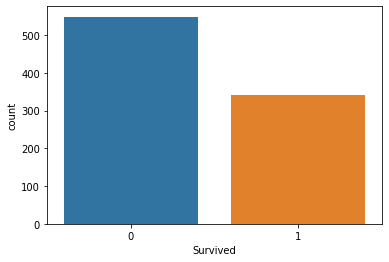

In [633]:
sns.countplot(x='Survived',data=titanic) #survived vs not survived

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Survived', ylabel='count'>

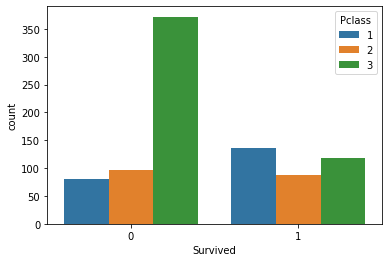

In [634]:
sns.countplot(x='Survived',data=titanic,hue='Pclass') #survived vs not survived (male vs female) or class

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Survived', ylabel='count'>

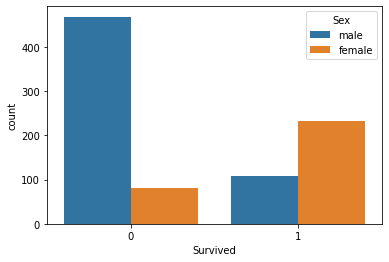

In [635]:
sns.countplot(x='Survived',data=titanic,hue='Sex') #survived vs not survived (male vs female) or class

In [636]:
titanic.isna() #which values are null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [637]:
titanic.isna().sum() #count of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

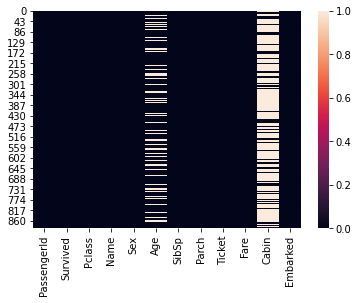

In [638]:
sns.heatmap(titanic.isna())#visualize null values by heatmap

In [639]:
titanic.drop('Cabin',axis=1,inplace=True) # contain more null values
#inplace make the changes true in dataframe


test_data.drop('Cabin',axis=1,inplace=True)

In [640]:
titanic['Age'].isna().sum()/len(titanic['Age'])*100

19.865319865319865

In [641]:
#make all non-numeric to numeric like sex
gender=pd.get_dummies(titanic['Sex'],drop_first=True)
titanic['Gender']=gender



gender=pd.get_dummies(test_data['Sex'],drop_first=True)
test_data['Gender']=gender

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='count'>

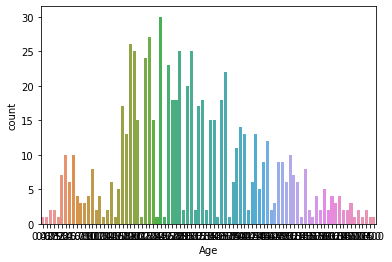

In [642]:
sns.countplot(x='Age',data=titanic) # plot of the count of every age

<IPython.core.display.Javascript object>

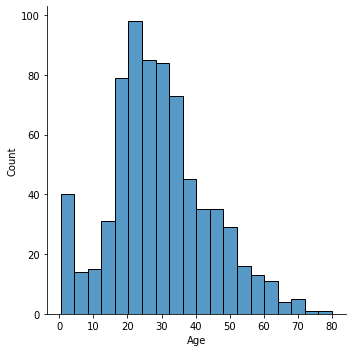

In [643]:
sns.displot(x='Age',data=titanic) #plot of the distribution of age

In [644]:
#we have to missing values of age 
#we use fillna method and fill by avg value of all ages
avg=titanic['Age'].mean()
titanic['Age'].fillna(avg,inplace=True)
titanic['Age'].isna().sum() #filled



avg=test_data['Age'].mean()
test_data['Age'].fillna(avg,inplace=True)
test_data['Age'].isna().sum() #filled

avg=test_data['Fare'].mean()
test_data['Fare'].fillna(avg,inplace=True)
test_data['Fare'].isna().sum() #filled

0

In [645]:
#drop colums which will not affect the prediction like name or sex 
titanic.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)


pasengerid=test_data['PassengerId']
test_data.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [646]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [647]:
#separate target and feature (x,y)
x=titanic[['Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic['Survived']

In [648]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [649]:
#make regressor
model=LogisticRegression()

<IPython.core.display.Javascript object>

In [650]:
#training
model.fit(x,y)

LogisticRegression()

In [651]:
#prediction of result
real_predictions=model.predict(test_data)
#test_prediction=model.predict(x_test)
real_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [652]:
#testing and accuracy finding of model

In [653]:
pd.DataFrame(metrics.confusion_matrix(y[0:418],real_predictions),columns=['Predicted Yes','Predicted No'],index=['Actual Yes','Actual No'])

,Predicted Yes,Predicted No
Actual Yes,154,101
Actual No,109,54


In [654]:
#import classifiaction report
from sklearn.metrics import classification_report
print(classification_report(y[0:418],real_predictions))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59       255
           1       0.35      0.33      0.34       163

    accuracy                           0.50       418
   macro avg       0.47      0.47      0.47       418
weighted avg       0.49      0.50      0.50       418



In [655]:
output = pd.DataFrame({
    'PassengerId':pasengerid,
    'Survived':real_predictions
})

output.to_csv('csv_to_submit.csv', index = False)